In [22]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import corner

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import urllib.request
url = "https://raw.githubusercontent.com/tcollett/LensPop/master/lenses_Euclid.txt"
urllib.request.urlretrieve(url, "lenses_Euclid.txt")

('lenses_Euclid.txt', <http.client.HTTPMessage at 0x128bd30b8>)

In [3]:
lenses_Euclid = pd.read_csv("lenses_Euclid.txt", skiprows=24, header=None, delimiter=' ')

In [4]:
with open("lenses_Euclid.txt") as myfile:
    head = [next(myfile) for x in range(24)]
print(head)

['#Lens population discoverable in the Euclid\n', '#\n', '#The population was forecast by T.Collett (ICG, Portsmouth) - please cite Collett (2015)\n', '#\n', '#Each line in the table represents a single lens. The table represnts 0.1 of the full sky (i.e. each lens should be weighted by A/4200, where A is the area of the survey in square degrees)\n', '#The columns in the table are:\n', '#------------------------------------\n', '#[0] zl, lens redshift \n', '#[1] zs, source redshift \n', '#[2] b, Einstein radius (arcseconds) \n', '#[3] sig_v, lens velocity dispersion (km/s) \n', '#[4] ql, lens flattening (1=circular, q=1-e) \n', '#[5] rl, lens half light radius (arcseconds) NB/ sersic index is 4\n', '#[6] lens VIS band magnitude\n', '#[7] xs, source x coordinate relative, 0 is lens centre (arcseconds) \n', '#[8] ys, source y coordinate relative, 0 is lens centre (arcseconds) \n', '#[9] qs, source flattening (1=circular, q=1-e) \n', '#[10] ps, source position angle (degrees)\n', '#[11] rs

In [77]:
np.sum(lenses_Euclid[11] == 0)

10

In [134]:
data = np.transpose([np.log10(lenses_Euclid[0]), np.log10(lenses_Euclid[1]), np.log10(lenses_Euclid[2]), lenses_Euclid[3], (lenses_Euclid[4]), lenses_Euclid[7], lenses_Euclid[8], np.log10(lenses_Euclid[11]), lenses_Euclid[12]])
labels = ['$z_l$','$z_s$','$\log10\\theta_E$', '$\sigma_v$', '$q$', '$\\theta_x$','$\\theta_y$', '$\\theta_s$', 'mag']
lenses_pd = pd.DataFrame(data, columns=labels)
lenses_pd_cuts = lenses_pd[lenses_pd['$\\theta_s$'] > -np.inf]

/Users/smsharma/.conda/envs/StrongLensing-Inference/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


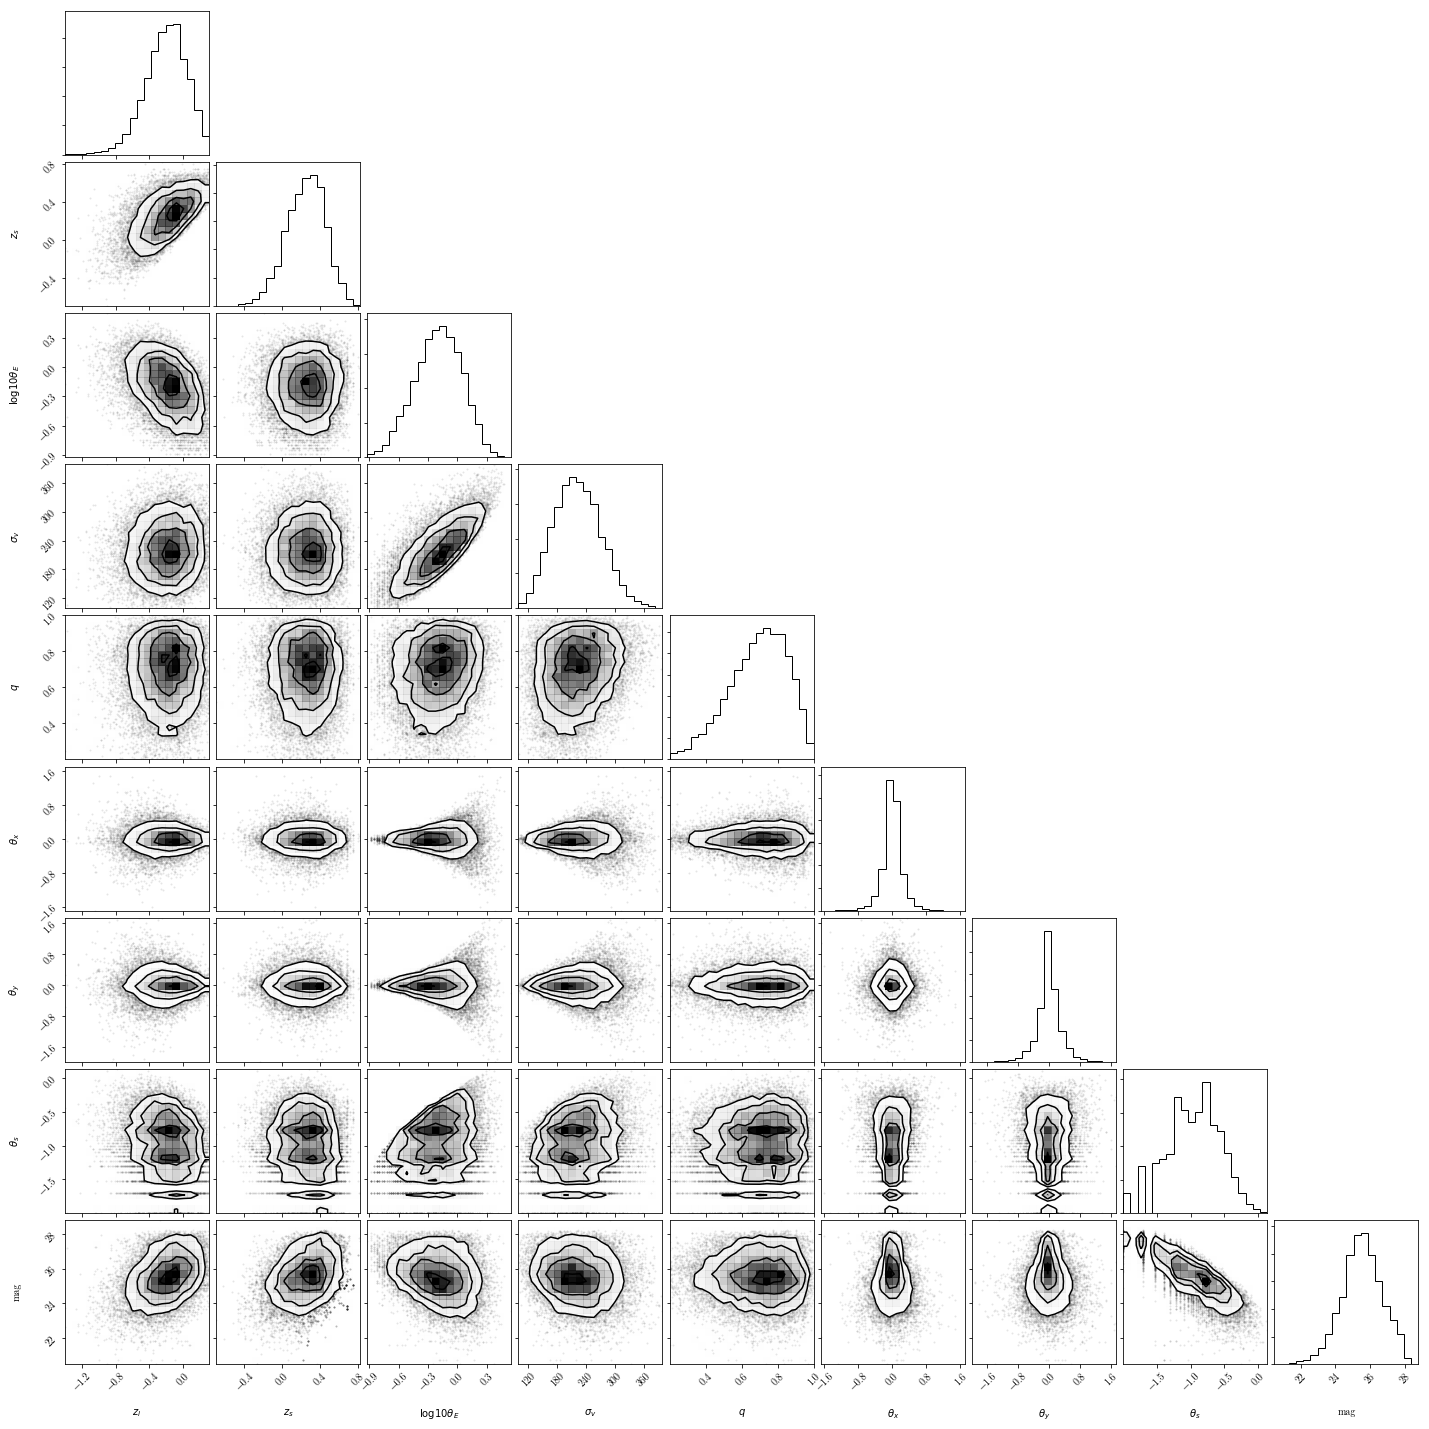

In [137]:
corner.corner(lenses_pd_cuts);

In [130]:
data = lenses_pd_cuts
mean = np.mean(data, axis=0)
cov = np.cov(data, rowvar=0)

In [133]:
mean.values

array([-2.09697676e-01,  2.44516730e-01, -1.96187450e-01,  2.22271987e+02,
        6.88602039e-01,  6.32935143e-04,  3.33666896e-03, -9.58628116e-01,
        2.55134987e+01])

In [100]:
# np.random.multivariate_normal(mean, cov)

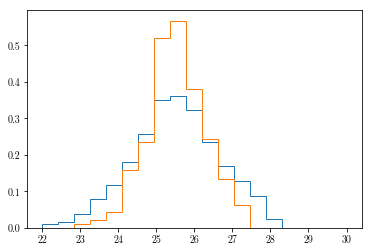

In [17]:
lenses_Euclid_sel = lenses_Euclid[(lenses_Euclid[1] > 0.) * (lenses_Euclid[1] < 20.) * (lenses_Euclid[11] < 10)]
lenses_Euclid_sel2 = lenses_Euclid[(lenses_Euclid[1] > 1.) * (lenses_Euclid[1] < 1.2) * (lenses_Euclid[11] < 0.2) * (lenses_Euclid[11] > 0.02)]

plt.hist(lenses_Euclid_sel[12], bins = np.linspace(22,30,20), histtype='step', normed=True);
plt.hist(lenses_Euclid_sel2[12], bins = np.linspace(22,30,20), histtype='step', normed=True);



In [53]:
np.mean(lenses_Euclid_sel2[12])

25.53316631130064